In [1]:
cd ~/work/home/feser/work/ocaml-workspace/staged-synth/runs/towers

/home/jovyan/work/mnt/scratch/metric-synth-runs/2022-07-02-17:20:16


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm
from shared import load, plot_ablations

In [3]:
df = load('.')

100%|████████████████████████████████████████████████| 344/344 [00:00<00:00, 39188.46it/s]


In [4]:
df.groupby(['n_groups', 'threshold', 'max_cost', 'extract', 'repair', 'rank']).agg({'success':['mean','count'], 
                                                       'runtime':['min', 'median', 'max'],
                                                       'program_size':['min', 'median', 'max']})

success         runtime  \
                                                      mean count       min   
n_groups threshold max_cost extract repair rank                              
100      0.0       40       Greedy  Guided True   0.529412    34  0.998462   
         0.4       40       Greedy  Guided False  0.000000    34       NaN   
                                           True   0.705882    34  0.846933   
                                    Random True   0.705882    34  0.844118   
                            Random  Guided True   0.705882    34  0.835420   

                                                                        \
                                                    median         max   
n_groups threshold max_cost extract repair rank                          
100      0.0       40       Greedy  Guided True   6.794237  396.823748   
         0.4       40       Greedy  Guided False       NaN         NaN   
                                           True   8.544912  353.879635   
                                    Random True   8.583675  354.189252   
                            Random  Guided True   8.585669  353.713532   

                                                 program_size               
                                                          min median   max  
n_groups threshold max_cost extract repair rank                             
100      0.0       40       Greedy  Guided True          10.0   17.0  38.0  
         0.4       40       Greedy  Guided False          NaN    NaN   NaN  
                                           True          10.0   19.0  38.0  
                                    Random True          10.0   19.0  38.0  
                            Random  Guided True          10.0   19.0  38.0

In [5]:
n_bench = 34

<Figure size 432x288 with 0 Axes>

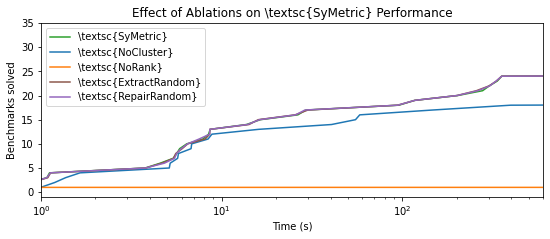

In [8]:
ax = plot_ablations(df)
ax.set_ylim([-1, n_bench + 1])
ax.set_xlim([1e0, 600])
ax.set_xscale("log")
plt.legend(loc="upper left")
plt.show()

In [5]:
df

,method,bench,max_cost,n_groups,threshold,success,runtime,program_size,timeout,local_search_steps,...,backward_pass_repeats,extract,repair,rank,repair_time,xfta_time,cluster_time,extract_time,rank_time,expansion_time
44,metric,test0.sexp,40,100,0.4,True,1.115562,11.0,0.0,100,...,10,Greedy,Guided,True,0.0,0.0,0.113425,0.0,0.006021,0.473856
49,metric,test0.sexp,40,100,0.4,False,NaN,NaN,1.0,100,...,10,Greedy,Guided,False,0.0,0.0,0.409045,0.0,0.000000,0.000166
78,metric,test0.sexp,40,100,0.4,True,1.130015,11.0,0.0,100,...,10,Random,Guided,True,0.0,0.0,0.113579,0.0,0.006052,0.475104
80,metric,test0.sexp,40,100,0.0,True,1.368849,11.0,0.0,100,...,10,Greedy,Guided,True,0.0,0.0,0.004773,0.0,0.000511,0.585727
151,metric,test0.sexp,40,100,0.4,True,1.127953,11.0,0.0,100,...,10,Greedy,Random,True,0.0,0.0,0.113365,0.0,0.006028,0.484106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,metric,test9.sexp,40,100,0.4,True,3.803849,15.0,0.0,100,...,10,Random,Guided,True,0.0,0.0,0.300348,0.0,0.007515,1.867269
42,metric,test9.sexp,40,100,0.4,False,NaN,NaN,1.0,100,...,10,Greedy,Guided,False,0.0,0.0,0.420507,0.0,0.000000,0.000227
95,metric,test9.sexp,40,100,0.4,True,3.767435,15.0,0.0,100,...,10,Greedy,Guided,True,0.0,0.0,0.298918,0.0,0.007139,1.815002
96,metric,test9.sexp,40,100,0.4,True,3.780403,15.0,0.0,100,...,10,Greedy,Random,True,0.0,0.0,0.297373,0.0,0.007088,1.848985
